In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords

In [5]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [6]:
df2 = pd.DataFrame(columns=['ID', 'text','sentiment'])

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  polarity = analysis.sentiment.polarity
  if polarity > 0:
       sentimento = 'positivo'
  elif polarity == 0:
       sentimento = 'neutro'
  else:
       sentimento = 'negativo'

  df2.loc[count] = [tweet.id]+[tweet.text]+[sentimento]
  
  count += 1

In [10]:
df2

,ID,text,sentiment
0,1635788384902717440,@Zambelli2210 @rodrigopacheco Se incluir na CP...,neutro
1,1635788104404484096,"Eu sou absolutamente a favor do ""todes"", desde...",neutro
2,1635787894551121920,"Lucro da Eletrobras cai 36% e atinge R$ 3,64 b...",neutro
3,1635787283214352387,RT @agsportlight: O título grita para o supost...,positivo
4,1635786100454072321,"Após privatização, Eletrobras registra prejuíz...",neutro
...,...,...,...
1995,1634639655403495427,Deputado @ze_haroldo RR precisamos de seu apoi...,neutro
1996,1634639548540911617,Deputado @depnicoletti RR precisamos de seu ap...,neutro
1997,1634639350309744642,RT @jhzago: O Povo Brasileiro tem que exigir a...,positivo
1998,1634639045794975745,Deputado @albuquerque2022 RR precisamos de seu...,neutro


In [11]:

#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models


In [12]:
df2.head()

,ID,text,sentiment
0,1635788384902717440,@Zambelli2210 @rodrigopacheco Se incluir na CP...,neutro
1,1635788104404484096,"Eu sou absolutamente a favor do ""todes"", desde...",neutro
2,1635787894551121920,"Lucro da Eletrobras cai 36% e atinge R$ 3,64 b...",neutro
3,1635787283214352387,RT @agsportlight: O título grita para o supost...,positivo
4,1635786100454072321,"Após privatização, Eletrobras registra prejuíz...",neutro


In [13]:
df2.iloc[4]

ID                                         1635786100454072321
text         Após privatização, Eletrobras registra prejuíz...
sentiment                                               neutro
Name: 4, dtype: object

In [14]:
df2.iloc[1,1]

'Eu sou absolutamente a favor do "todes", desde que venha acompanhado de retomar o pré-sal, a Eletrobras, Carajás e a soberania brasileira. Se for para fazer figuração no Altas Horas, tô fora!'

In [15]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [16]:
df2.head()

,ID,text,sentiment
0,1635788384902717440,@ @rodrigopacheco se incluir na cpmi investig...,neutro
1,1635788104404484096,"eu sou absolutamente a favor do ""todes"", desde...",neutro
2,1635787894551121920,"lucro da eletrobras cai % e atinge r$ , bil...",neutro
3,1635787283214352387,rt @agsportlight: o título grita para o supost...,positivo
4,1635786100454072321,"após privatização, eletrobras registra prejuíz...",neutro


In [17]:
# Essa expressão regular remove toda a pontuação


punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

df2.head()

,ID,text,sentiment
0,1635788384902717440,rodrigopacheco se incluir na cpmi investig...,neutro
1,1635788104404484096,eu sou absolutamente a favor do todes desde...,neutro
2,1635787894551121920,lucro da eletrobras cai e atinge r bil...,neutro
3,1635787283214352387,rt agsportlight o título grita para o supost...,positivo
4,1635786100454072321,após privatização eletrobras registra prejuíz...,neutro


In [18]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,text,sentiment,tokens
0,1635788384902717440,rodrigopacheco se incluir na cpmi investig...,neutro,"[rodrigopacheco, se, incluir, na, cpmi, invest..."
1,1635788104404484096,eu sou absolutamente a favor do todes desde...,neutro,"[eu, sou, absolutamente, a, favor, do, todes, ..."
2,1635787894551121920,lucro da eletrobras cai e atinge r bil...,neutro,"[lucro, da, eletrobras, cai, e, atinge, r, bil..."
3,1635787283214352387,rt agsportlight o título grita para o supost...,positivo,"[rt, agsportlight, o, título, grita, para, o, ..."
4,1635786100454072321,após privatização eletrobras registra prejuíz...,neutro,"[após, privatização, eletrobras, registra, pre..."


In [19]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['rodrigopacheco',
 'se',
 'incluir',
 'na',
 'cpmi',
 'investigar',
 'a',
 'venda',
 'da',
 'eletrobrás']

In [20]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(1716, 'de'),
 (1341, 'eletrobras'),
 (1265, 'a'),
 (1168, 'da'),
 (1100, 'rt'),
 (965, 'o'),
 (931, 'https'),
 (929, 'co'),
 (928, 't'),
 (723, 'e')]

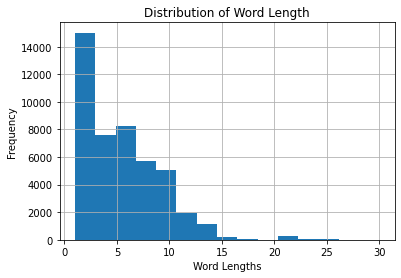

In [21]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [22]:
word_counts[:10]

[(1716, 'de'),
 (1341, 'eletrobras'),
 (1265, 'a'),
 (1168, 'da'),
 (1100, 'rt'),
 (965, 'o'),
 (931, 'https'),
 (929, 'co'),
 (928, 't'),
 (723, 'e')]

In [23]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,text,sentiment,tokens,tokens_stop
0,1635788384902717440,rodrigopacheco se incluir na cpmi investig...,neutro,"[rodrigopacheco, se, incluir, na, cpmi, invest...","[rodrigopacheco, incluir, cpmi, investigar, ve..."
1,1635788104404484096,eu sou absolutamente a favor do todes desde...,neutro,"[eu, sou, absolutamente, a, favor, do, todes, ...","[absolutamente, favor, todes, desde, venha, ac..."
2,1635787894551121920,lucro da eletrobras cai e atinge r bil...,neutro,"[lucro, da, eletrobras, cai, e, atinge, r, bil...","[lucro, eletrobras, cai, atinge, r, bilhões, s..."
3,1635787283214352387,rt agsportlight o título grita para o supost...,positivo,"[rt, agsportlight, o, título, grita, para, o, ...","[agsportlight, título, grita, suposto, lucro, ..."
4,1635786100454072321,após privatização eletrobras registra prejuíz...,neutro,"[após, privatização, eletrobras, registra, pre...","[após, privatização, eletrobras, registra, pre..."


In [24]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [25]:
word_list_stop[:10]

['rodrigopacheco',
 'incluir',
 'cpmi',
 'investigar',
 'venda',
 'eletrobrás',
 'rlam',
 'vou',
 'apoiar',
 'cpmi']

In [26]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,ID,text,sentiment,tokens,tokens_stop,tokens_pos
0,1635788384902717440,rodrigopacheco se incluir na cpmi investig...,neutro,"[rodrigopacheco, se, incluir, na, cpmi, invest...","[rodrigopacheco, incluir, cpmi, investigar, ve...","[(rodrigopacheco, NN), (incluir, NN), (cpmi, N..."
1,1635788104404484096,eu sou absolutamente a favor do todes desde...,neutro,"[eu, sou, absolutamente, a, favor, do, todes, ...","[absolutamente, favor, todes, desde, venha, ac...","[(absolutamente, NNS), (favor, VBP), (todes, N..."
2,1635787894551121920,lucro da eletrobras cai e atinge r bil...,neutro,"[lucro, da, eletrobras, cai, e, atinge, r, bil...","[lucro, eletrobras, cai, atinge, r, bilhões, s...","[(lucro, NN), (eletrobras, NNS), (cai, VBP), (..."
3,1635787283214352387,rt agsportlight o título grita para o supost...,positivo,"[rt, agsportlight, o, título, grita, para, o, ...","[agsportlight, título, grita, suposto, lucro, ...","[(agsportlight, JJ), (título, NN), (grita, NN)..."
4,1635786100454072321,após privatização eletrobras registra prejuíz...,neutro,"[após, privatização, eletrobras, registra, pre...","[após, privatização, eletrobras, registra, pre...","[(após, NN), (privatização, NN), (eletrobras, ..."


In [27]:
### ??
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

df2['tokens_stem'] = df2.tokens_stop.apply(stem_lambda)
df2.head()

,ID,text,sentiment,tokens,tokens_stop,tokens_pos,tokens_stem
0,1635788384902717440,rodrigopacheco se incluir na cpmi investig...,neutro,"[rodrigopacheco, se, incluir, na, cpmi, invest...","[rodrigopacheco, incluir, cpmi, investigar, ve...","[(rodrigopacheco, NN), (incluir, NN), (cpmi, N...","[rodrigopachec, inclu, cpmi, investig, vend, e..."
1,1635788104404484096,eu sou absolutamente a favor do todes desde...,neutro,"[eu, sou, absolutamente, a, favor, do, todes, ...","[absolutamente, favor, todes, desde, venha, ac...","[(absolutamente, NNS), (favor, VBP), (todes, N...","[absolut, favor, tod, desd, venh, acompanh, re..."
2,1635787894551121920,lucro da eletrobras cai e atinge r bil...,neutro,"[lucro, da, eletrobras, cai, e, atinge, r, bil...","[lucro, eletrobras, cai, atinge, r, bilhões, s...","[(lucro, NN), (eletrobras, NNS), (cai, VBP), (...","[lucr, eletrobr, cai, ating, r, bilhõ, snzkgsx..."
3,1635787283214352387,rt agsportlight o título grita para o supost...,positivo,"[rt, agsportlight, o, título, grita, para, o, ...","[agsportlight, título, grita, suposto, lucro, ...","[(agsportlight, JJ), (título, NN), (grita, NN)...","[agsportlight, títul, grit, supost, lucr, elet..."
4,1635786100454072321,após privatização eletrobras registra prejuíz...,neutro,"[após, privatização, eletrobras, registra, pre...","[após, privatização, eletrobras, registra, pre...","[(após, NN), (privatização, NN), (eletrobras, ...","[após, privatiz, eletrobr, registr, prejuíz, a..."


In [28]:
##  ??
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df2.tokens_stem.tolist(), [])

word_list_clean[:10]


['rodrigopachec',
 'inclu',
 'cpmi',
 'investig',
 'vend',
 'eletrobrás',
 'rlam',
 'vou',
 'apoi',
 'cpmi']

In [29]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(1341, 'eletrobras'),
 (566, 'eletrobrás'),
 (469, 'reestatização'),
 (443, 'r'),
 (385, 'prejuízo'),
 (332, 'frente'),
 (318, 'milhões'),
 (280, 'reestatizaeletrobrasjá'),
 (270, 'código'),
 (267, 'trimestre')]

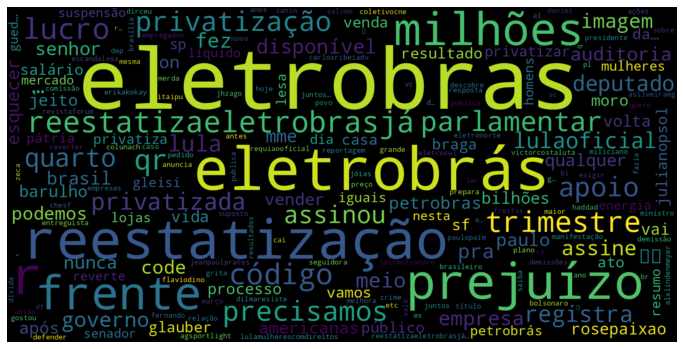

In [30]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
file_name = 'DF2.xlsx'
df2.to_excel(file_name)

In [32]:
comentarios = df2["text"].values
comentarios

array(['    rodrigopacheco se incluir na cpmi investigar a venda da eletrobrás e da rlam eu vou apoiar a cpmi    não precisa nem investigar o roubo das jóias pq todos sabemos que foi propina dos sauditas e emirados donos do mubadala ',
       'eu sou absolutamente a favor do  todes   desde que venha acompanhado de retomar o pré sal  a eletrobras  carajás e a soberania brasileira  se for para fazer figuração no altas horas  tô fora ',
       'lucro da eletrobras cai    e atinge r      bilhões em  \nhttps   t co snzkgsxqgp',
       ...,
       'rt  jhzago  o povo brasileiro tem que exigir a reestatização da vale  da petrobras e da eletrobras  a auditoria da dívida publica da união …',
       'deputado    rr precisamos de seu apoio na frente parlamentar pela reestatização da eletrobras eletronorte  o senhor já assinou  se não  assine por meio do código qr disponível na imagem qr code ou no código    \n reestatizaeletrobrasjá https   t co  ',
       'rt  blogdonoblat  lula nomeia enio verr

In [33]:
classes = df2["sentiment"].values
classes

array(['neutro', 'neutro', 'neutro', ..., 'positivo', 'neutro', 'neutro'],
      dtype=object)

In [34]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)



MultinomialNB()

In [35]:
#teste_modelo = ['querido']
#freq_testes = vectorizer.transform(teste_modelo)
#modelo.predict(freq_testes)

In [36]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


array(['positivo', 'positivo', 'neutro', ..., 'positivo', 'neutro',
       'neutro'], dtype='<U8')

In [37]:
metrics.accuracy_score(classes, resultados)

0.9085

In [38]:
##sentimentos = ["positivo","neutro","negativo"]

In [39]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       0.20      0.20      0.20         5
      neutro       0.99      0.91      0.95      1857
    positivo       0.43      0.86      0.57       138

    accuracy                           0.91      2000
   macro avg       0.54      0.66      0.57      2000
weighted avg       0.95      0.91      0.92      2000



In [40]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   negativo  neutro  positivo   All
Real                                      
negativo         1       2         2     5
neutro           4    1697       156  1857
positivo         0      19       119   138
All              5    1718       277  2000


In [41]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 3))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB()

In [42]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


array(['positivo', 'positivo', 'neutro', ..., 'positivo', 'neutro',
       'neutro'], dtype='<U8')

In [43]:
metrics.accuracy_score(classes, resultados)

0.768

In [44]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       0.07      0.40      0.12         5
      neutro       1.00      0.76      0.86      1857
    positivo       0.23      0.93      0.37       138

    accuracy                           0.77      2000
   macro avg       0.43      0.70      0.45      2000
weighted avg       0.94      0.77      0.82      2000



 Modelo Com Randow Forest

In [45]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [46]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<2000x3511 sparse matrix of type '<class 'numpy.int64'>'
	with 24884 stored elements in Compressed Sparse Row format>

In [47]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [48]:
class_sentimentos = df2["sentiment"].values
class_sentimentos

array(['neutro', 'neutro', 'neutro', ..., 'positivo', 'neutro', 'neutro'],
      dtype=object)

In [49]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [50]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<2000x3511 sparse matrix of type '<class 'numpy.int64'>'
	with 24884 stored elements in Compressed Sparse Row format>

In [51]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['neutro', 'neutro', 'neutro', ..., 'positivo', 'neutro', 'neutro'],
      dtype=object)

In [52]:
metrics.accuracy_score(classes, resultados)

1.0

In [53]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         5
      neutro       1.00      1.00      1.00      1857
    positivo       1.00      1.00      1.00       138

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [54]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   negativo  neutro  positivo   All
Real                                      
negativo         5       0         0     5
neutro           0    1857         0  1857
positivo         0       0       138   138
All              5    1857       138  2000
